Importing the necessary libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
# Magic function for plotting the graphs within the notebook. 
%matplotlib inline

In [3]:
# For the better palette and themes. 
sns.set()

The source file downloaded is present under the .\source folder with the name, dataset.csv. 

This file has in total of 13 columns but some of the rows have commas as part of the field values which made some rows to have more or less columns than needed. For example, the 4th row is as follows:

    U Launcher Lite â€“ FREE Live Cool Themes, Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up				
    
Which indicates that some of the fields were not surrounded with double quotes to include commas as part of the field value. Hence the following code is being used to preprocess the dataset to be suitable for loading into Pandas. 

The correction made is to merge all the column data before the category column, here in the above case ART_AND_DESIGN into a single column and replace the ',' in the first column to space. 

    U Launcher Lite â€“ FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
    
This would align the columns properly with the column headers. 

The row:

    "Life Made WI-Fi Touchscreen Photo Frame,,1.9,19,3.0M,"1,000+",Free,0,Everyone,,"February 11, 2018",1.0.19,4.0 and up				"
    
occuring originally at 10474 row is missing the category, and hence this has been deleted from the source file. 

In [4]:
# input source file. 
input_file = open(r'.\source\dataset.csv', 'r', encoding = 'utf-8')
# processed file with corrections made to the columns. 
output_file = open(r'.\processed\dataset_clean.csv', 'w', encoding = 'utf-8', newline = '')

# Creating a csv reader from the input source file. 
csv_reader = csv.reader(input_file, delimiter = ',')

# Creating a csv writer for the processed file. 
csv_writer = csv.writer(output_file, delimiter = ',')

# The unique values of the column, CATEGORY which we will use for merging process. 
categories = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

# This variable is for the header to be excluded from the above process. 
row_counter = 0

for row in csv_reader:

    # The below code will exclude the first row which is the header and it will write the header to the processed file as it is. 
    if not row_counter:
        csv_writer.writerow(row)
        row_counter = 1
        continue

    # target variable for the processed file. 
    new_row = []

    flag = False

    # The idea is as follows:
    # Take all the column values and create them as a single value to be placed in the first column until we reach the CATEGORY.
    # The moment we reach category, we will include all the column values as it is into the dataset without any change. 
    for value in row:
        if (value not in categories) and (not flag):
            if new_row == []:
                new_row.append(value)
            else:
                new_row[0] += value
        else:
            new_row.append(value)
            flag = True
    
    new_row[-1] = new_row[-1].strip()

    csv_writer.writerow(new_row)

# cleanup for open files. 
input_file.close()
output_file.close()

Now we are going to read the dataset_clean.csv file into our Pandas DataFrame. 

In [5]:
# The seperator is default ',', and the encoding chosen is utf8 for special characters present in the file. 
df = pd.read_csv(r'.\processed\dataset_clean.csv', encoding = 'utf8', na_values = ['inf', np.inf])

Checking to see if the data has been loaded correctly or not. 

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\t\t\t\t
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite â€“ FREE Live Cool Themes Hide...,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\t\t\t\t
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Checking the columns. 

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver\t\t\t\t'],
      dtype='object')

We have extra tab characters as part of the columns, which can be removed using the following code. 

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
df.shape

(10840, 13)

We have in total of 10840 rows and 13 columns in the dataset. 

Checking on the `info()` method to see the metadata. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#### Memory Usage

Let's try and see if we can reduce the memory usage of this particular dataset. 

In [13]:
df.memory_usage(deep = True)

Index                128
App               891465
Category          715705
Rating             86720
Reviews            86720
Size              679727
Installs          703724
Type              661211
Price             672192
Content Rating    702441
Genres            730855
Last Updated      768299
Current Ver       692502
Android Ver       740703
dtype: int64

There are some categorical columns which we can check to see if we can convert them info 'pd.Categorical' type. 

In [14]:
df['Category'].nunique()

33

The number of values in `Category` is quite less than the total number of rows, hence we can convert this into categorical column. 

In [15]:
df['Category'] = df['Category'].astype('category')

In [16]:
df.memory_usage(deep = True)

Index                128
App               891465
Category           14360
Rating             86720
Reviews            86720
Size              679727
Installs          703724
Type              661211
Price             672192
Content Rating    702441
Genres            730855
Last Updated      768299
Current Ver       692502
Android Ver       740703
dtype: int64

Similarly the column, `Type` can be converted into a categorical column. 

In [17]:
df['Type'] = df['Type'].astype('category')

In [18]:
df.memory_usage(deep = True)

Index                128
App               891465
Category           14360
Rating             86720
Reviews            86720
Size              679727
Installs          703724
Type               11042
Price             672192
Content Rating    702441
Genres            730855
Last Updated      768299
Current Ver       692502
Android Ver       740703
dtype: int64

Let's check for the column `Content Rating`. 

In [19]:
df['Content Rating'].nunique()

6

Since we have only 6 values, it is a good candidate to convert this into categorical value. 

In [20]:
df['Content Rating'] = df['Content Rating'].astype('category')

In [21]:
df.memory_usage(deep = True)

Index                128
App               891465
Category           14360
Rating             86720
Reviews            86720
Size              679727
Installs          703724
Type               11042
Price             672192
Content Rating     11398
Genres            730855
Last Updated      768299
Current Ver       692502
Android Ver       740703
dtype: int64

Let's see for the column, `Genres`. 

In [22]:
df['Genres'].nunique()

119

We have 119 values, and this can be converted into a category column. 

In [23]:
df['Genres'] = df['Genres'].astype('category')

In [24]:
df.memory_usage(deep = True)

Index                128
App               891465
Category           14360
Rating             86720
Reviews            86720
Size              679727
Installs          703724
Type               11042
Price             672192
Content Rating     11398
Genres             24856
Last Updated      768299
Current Ver       692502
Android Ver       740703
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null category
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null category
Price             10840 non-null object
Content Rating    10840 non-null category
Genres            10840 non-null category
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: category(4), float64(1), int64(1), object(7)
memory usage: 812.4+ KB


The memory usage of the file has been reduced to 800+ KB from 1.1 MB. 

Let's check the `reviews` column to see if we can get any memory improvement from there. 

In [26]:
df['Reviews'].min(), df['Reviews'].max()

(0, 78158306)

This can be converted into a float16 datatype. 

In [27]:
df['Reviews'] = df['Reviews'].astype('float16')

The `Ratings` column can also be converted into `float16` datatype. 

In [28]:
df['Rating'] = df['Rating'].astype('float16')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null category
Rating            9366 non-null float16
Reviews           10840 non-null float16
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null category
Price             10840 non-null object
Content Rating    10840 non-null category
Genres            10840 non-null category
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: category(4), float16(2), object(7)
memory usage: 685.4+ KB


The memory of the dataset has been reduced to 685 KB. 

The `price` column has been assigned a object type by default. This would have to be changed to a float. Before we make the changes, the price column has the `$` sign in it, which would need to be removed for performing the analysis. 

In [30]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype('float32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null category
Rating            9366 non-null float16
Reviews           10840 non-null float16
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null category
Price             10840 non-null float32
Content Rating    10840 non-null category
Genres            10840 non-null category
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: category(4), float16(2), float32(1), object(6)
memory usage: 643.0+ KB


#### Checking for any duplicate values in the dataset

In [32]:
df.loc[df.duplicated(keep = 'first')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.199219,inf,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.199219,inf,Varies with device,"10,000,000+",Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.398438,inf,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.398438,31616.0,37M,"10,000,000+",Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.000000,6988.0,Varies with device,"1,000,000+",Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,Who Viewed My Facebook Profile - Stalkers Visi...,SOCIAL,4.601562,inf,9.9M,"5,000,000+",Free,0.0,Everyone,Social,"June 24, 2018",4.1.1,4.0.3 and up
10327,Garena Free Fire,GAME,4.500000,inf,53M,"100,000,000+",Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10645,Podcast App: Free & Offline Podcasts by Player FM,NEWS_AND_MAGAZINES,4.601562,inf,19M,"1,000,000+",Free,0.0,Teen,News & Magazines,"July 25, 2018",4.1.0.72,4.0 and up
10646,Motorola FM Radio,VIDEO_PLAYERS,3.900391,54816.0,Varies with device,"100,000,000+",Free,0.0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


Deleting the duplicated rows. 

In [33]:
df = df.drop_duplicates(keep = 'first')

In [34]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


The above cell shows that we have successfully removed the duplicate rows from the dataset. 

In [35]:
df.shape

(9844, 13)

#### Missing Value Treatment

We can try and see the missing values from the dataset. 

In [36]:
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Other than rating rest all of the columns where data is missing less than 5% of the data and hence we can consider them for deletion. 

In [37]:
df = df.dropna()

In [38]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [39]:
df.shape

(8373, 13)

After dropping the duplicates and removing the NA values, the final dataset has 8373 rows and 13 columns. 

#### Univariate Analysis - Categorical Columns

`Category` column is a categorical column, so let's check the frequency distribution of the same. 

In [40]:
category_column = df['Category'].value_counts()

In [41]:
category_column

FAMILY                 1689
GAME                    925
TOOLS                   722
FINANCE                 305
PRODUCTIVITY            304
LIFESTYLE               303
MEDICAL                 302
PERSONALIZATION         296
BUSINESS                267
PHOTOGRAPHY             267
SPORTS                  264
COMMUNICATION           261
HEALTH_AND_FITNESS      244
SOCIAL                  207
NEWS_AND_MAGAZINES      206
TRAVEL_AND_LOCAL        189
SHOPPING                187
BOOKS_AND_REFERENCE     170
VIDEO_PLAYERS           152
DATING                  144
MAPS_AND_NAVIGATION     121
EDUCATION               118
FOOD_AND_DRINK          102
ENTERTAINMENT           102
AUTO_AND_VEHICLES        73
WEATHER                  73
HOUSE_AND_HOME           63
LIBRARIES_AND_DEMO       63
ART_AND_DESIGN           60
COMICS                   57
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

From the data, we can say that the maximum number of categories of apps that were downloaded are from 'Family' and then followed by the 'Game'. Let's convert them into percentages for better understanding. 

In [42]:
df['Category'].value_counts(normalize = True)

FAMILY                 0.201720
GAME                   0.110474
TOOLS                  0.086230
FINANCE                0.036427
PRODUCTIVITY           0.036307
LIFESTYLE              0.036188
MEDICAL                0.036068
PERSONALIZATION        0.035352
BUSINESS               0.031888
PHOTOGRAPHY            0.031888
SPORTS                 0.031530
COMMUNICATION          0.031172
HEALTH_AND_FITNESS     0.029141
SOCIAL                 0.024722
NEWS_AND_MAGAZINES     0.024603
TRAVEL_AND_LOCAL       0.022573
SHOPPING               0.022334
BOOKS_AND_REFERENCE    0.020303
VIDEO_PLAYERS          0.018154
DATING                 0.017198
MAPS_AND_NAVIGATION    0.014451
EDUCATION              0.014093
FOOD_AND_DRINK         0.012182
ENTERTAINMENT          0.012182
AUTO_AND_VEHICLES      0.008718
WEATHER                0.008718
HOUSE_AND_HOME         0.007524
LIBRARIES_AND_DEMO     0.007524
ART_AND_DESIGN         0.007166
COMICS                 0.006808
PARENTING              0.005972
EVENTS  

Let's try and visualize the data. 

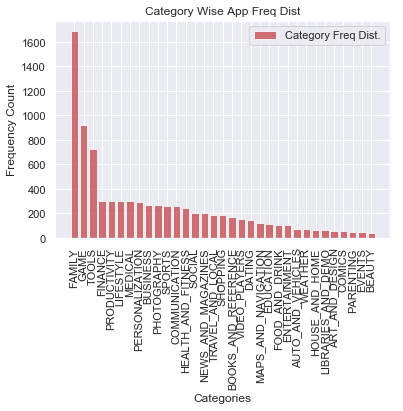

In [43]:
plt.bar(category_column.index, category_column.values, label = 'Category Freq Dist.', alpha = 0.8, color = 'r')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')

axes = plt.gca()
for label in axes.xaxis.get_ticklabels():    
    label.set_rotation(90)
    
plt.title('Category Wise App Freq Dist')
plt.legend()
plt.show()

The `Type` column is also categorical. Let's see the frequency distribution of the same. 

In [44]:
df['Type'].value_counts()

Free    7766
Paid     607
Name: Type, dtype: int64

Let's get the percentages of the same. 

In [45]:
df['Type'].value_counts(normalize = True)

Free    0.927505
Paid    0.072495
Name: Type, dtype: float64

So over 92% of the apps that were downloaded are Free and only little over 7% of the apps are Paid. 

In [46]:
type_column = df['Type'].value_counts()

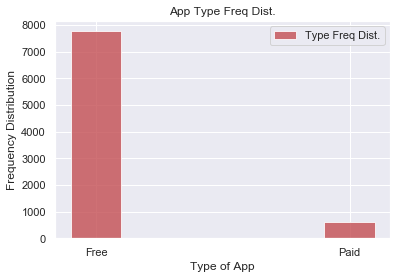

In [47]:
plt.bar(type_column.index, type_column.values, color = 'r', alpha = 0.8, label = 'Type Freq Dist.', width = 0.2)
plt.xlabel('Type of App')
plt.ylabel('Frequency Distribution')
plt.title('App Type Freq Dist.')
plt.legend()
plt.show()

The `Genres` column is also a categorical column. So let's take the frequency distribution of the same. 

In [48]:
df['Genres'].value_counts()

Tools                              721
Entertainment                      489
Education                          438
Finance                            305
Productivity                       304
                                  ... 
Card;Brain Games                     1
Books & Reference;Creativity         0
Art & Design;Action & Adventure      0
Trivia;Education                     0
Role Playing;Education               0
Name: Genres, Length: 119, dtype: int64

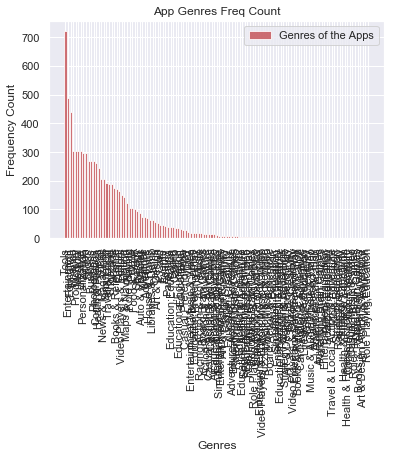

In [49]:
genre_column = df['Genres'].value_counts()
plt.bar(genre_column.index, genre_column.values, color = 'r', alpha = 0.8, label = 'Genres of the Apps')
plt.xlabel('Genres')
plt.ylabel('Frequency Count')
plt.title('App Genres Freq Count')
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.legend()
plt.show()

Since there are lot of `Genres`, we could probably see what are the top 10. 

In [50]:
genre_column.nlargest(10)

Tools              721
Entertainment      489
Education          438
Finance            305
Productivity       304
Medical            302
Lifestyle          302
Personalization    296
Action             295
Sports             270
Name: Genres, dtype: int64

We could also see what are the bottom 10. 

In [51]:
genre_column.nsmallest(10)

Books & Reference;Creativity       0
Art & Design;Action & Adventure    0
Trivia;Education                   0
Role Playing;Education             0
Lifestyle;Education                1
Lifestyle;Pretend Play             1
Comics;Creativity                  1
Music & Audio;Music & Video        1
Arcade;Pretend Play                1
Adventure;Education                1
Name: Genres, dtype: int64

Most of these Genres seem to be misclassified or belong to multiple Genres. 

The column `Content Rating` is also a categorical column. 

In [52]:
df['Content Rating'].value_counts()

Everyone           6735
Teen                942
Mature 17+          373
Everyone 10+        319
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Let's take the percentages for better comparison. 

In [53]:
df['Content Rating'].value_counts(normalize = True)

Everyone           0.804371
Teen               0.112504
Mature 17+         0.044548
Everyone 10+       0.038099
Adults only 18+    0.000358
Unrated            0.000119
Name: Content Rating, dtype: float64

As we can see nearly 80% of the apps belong to Everyone. 

In [54]:
content_rating_column = df['Content Rating'].value_counts()

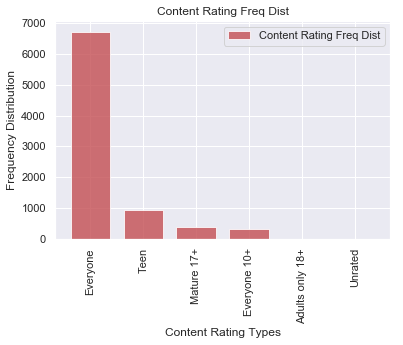

In [55]:
plt.bar(content_rating_column.index, content_rating_column.values, alpha = 0.8, color = 'r', label = 'Content Rating Freq Dist', width = 0.75)
plt.xlabel('Content Rating Types')
plt.ylabel('Frequency Distribution')
plt.title('Content Rating Freq Dist')
axes = plt.gca()

for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.legend()
plt.show()

#### Univariate Analysis - Quantitative 

In [56]:
inf_index = df[df['Reviews'] == np.inf].index

In [57]:
df = df.drop(index = inf_index)

We have dropped all the rows which have inf as the reviews. 

In [58]:
np.isinf(df['Reviews']).any().sum()

0

In [59]:
df[['Rating', 'Reviews', 'Price']].describe()

,Rating,Reviews,Price
count,6545.000000,6545.0,6545.000000
mean,4.128906,inf,1.298185
std,0.579590,inf,18.857975
min,1.000000,1.0,0.000000
25%,3.900391,65.0,0.000000
50%,4.199219,828.0,0.000000
75%,4.500000,9400.0,0.000000
max,5.000000,65440.0,400.000000


From the above the "Reviews" is having mean and std as inf, which might be due to precision as we have eradicated all the inf values in the column. Let's increase the precision to float64 instead. 

In [60]:
df['Reviews'] = df['Reviews'].astype('float64')

In [61]:
df[['Rating', 'Reviews', 'Price']].describe().round(2)

,Rating,Reviews,Price
count,6545.00,6545.00,6545.00
mean,4.13,8316.34,1.30
std,0.58,14484.27,18.86
min,1.00,1.00,0.00
25%,3.90,65.00,0.00
50%,4.20,828.00,0.00
75%,4.50,9400.00,0.00
max,5.00,65440.00,400.00


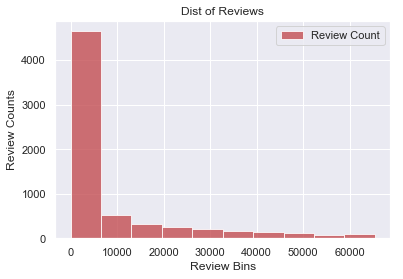

In [62]:
plt.hist(df['Reviews'].values, bins = 10, color = 'r', alpha = 0.8, label = 'Review Count')
plt.xlabel('Review Bins')
plt.ylabel('Review Counts')
plt.title('Dist of Reviews')
plt.legend()
plt.show()

Observations:

    The distribution of the data is positively skewed. And most of the values seem to be concentrated below 10,000. 

As it is evidently seen, most of the reviews are between 0 and 10,000.

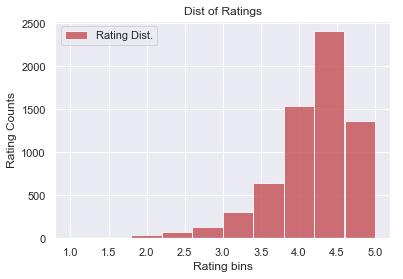

In [63]:
plt.hist(df['Rating'].values, bins = 10, alpha = 0.8, color = 'r', label = 'Rating Dist.')
plt.xlabel('Rating bins')
plt.ylabel('Rating Counts')
plt.title('Dist of Ratings')
plt.legend()
plt.show()

Observations:

    The distribution seems to be negatively skewed. And most of the values seem to be concentrated between 4.0 and 5.0 which mean most of the apps people found them as useful and hence gave them a good rating considering 4.0+ is a good rating. 

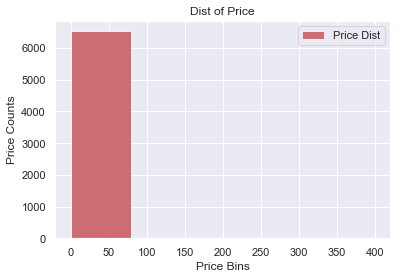

In [64]:
plt.hist(df['Price'].values, bins = 5, color = 'r', alpha = 0.8, label = 'Price Dist')
plt.xlabel('Price Bins')
plt.ylabel('Price Counts')
plt.title('Dist of Price')
plt.legend()
plt.show()

In [65]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

In [66]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

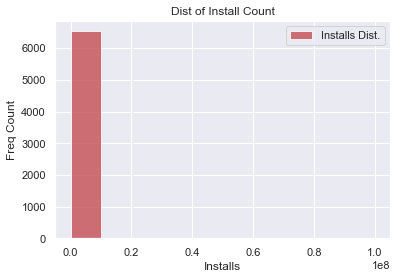

In [67]:
plt.hist(df['Installs'].values, bins = 10, label = 'Installs Dist.', alpha = 0.8, color = 'r')
plt.xlabel('Installs')
plt.ylabel('Freq Count')
plt.title('Dist of Install Count')
plt.legend()
plt.show()

#### Questions posed by IMT

1. Find total records in columns and their datatype

In [68]:
df.shape

(6545, 13)

We have total of 10841 rows and 13 columns. 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6545 entries, 0 to 10838
Data columns (total 13 columns):
App               6545 non-null object
Category          6545 non-null category
Rating            6545 non-null float16
Reviews           6545 non-null float64
Size              6545 non-null object
Installs          6545 non-null float64
Type              6545 non-null category
Price             6545 non-null float32
Content Rating    6545 non-null category
Genres            6545 non-null category
Last Updated      6545 non-null object
Current Ver       6545 non-null object
Android Ver       6545 non-null object
dtypes: category(4), float16(1), float32(1), float64(2), object(5)
memory usage: 480.7+ KB


We have in total categories 4, floats 4, and objects as 5. 

2. Calculate statastical parameter for numerical column

In [70]:
df[['Rating', 'Reviews', 'Price']].describe()

,Rating,Reviews,Price
count,6545.000,6545.000,6545.000
mean,4.129,8316.343,1.298
std,0.580,14484.267,18.858
min,1.000,1.000,0.000
25%,3.900,65.000,0.000
50%,4.199,828.000,0.000
75%,4.500,9400.000,0.000
max,5.000,65440.000,400.000


3. Find average rating of app?

In [71]:
df['Rating'].mean()

4.13

4. What is average rating of only those app which comes under Photography category

In [72]:
df.loc[df['Category'] == 'PHOTOGRAPHY', 'Rating'].mean()

4.027

5. How many are free and paid apps

In [73]:
df['Type'].value_counts()

Free    5953
Paid     592
Name: Type, dtype: int64

We have in total 5953 apps as Free and 592 apps which are paid. 

6. Select top 5 app which has maximum reviews

In [74]:
df.sort_values(by = 'Reviews', ascending = False)[['App', 'Reviews']].head(5)

,App,Reviews
8357,Citymapper - Transit Navigation,65440.000
5865,Gangster Town: Vice District,65152.000
5615,Galaxy at War Online,65120.000
7055,BZWBK24 mobile,64992.000
1075,BZWBK24 mobile,64960.000


7. Select top 5 app which has maximum Installs

In [75]:
df.sort_values(by = 'Installs', ascending = False)[['App', 'Installs']].head(5)

,App,Installs
3670,Motorola FM Radio,100000000.000
3242,Calculator,100000000.000
3489,Samsung Notes,100000000.000
3243,Device Help,100000000.000
3261,Samsung Calculator,100000000.000


#### Plotting points requested by IMT

1. Category Wise App Split

In [76]:
category_column_split = df['Category'].value_counts()

In [77]:
category_column_split

FAMILY                 1385
TOOLS                   581
GAME                    535
MEDICAL                 294
LIFESTYLE               278
FINANCE                 268
BUSINESS                239
PERSONALIZATION         239
PRODUCTIVITY            221
SPORTS                  194
HEALTH_AND_FITNESS      189
COMMUNICATION           174
NEWS_AND_MAGAZINES      170
PHOTOGRAPHY             160
TRAVEL_AND_LOCAL        158
SOCIAL                  141
BOOKS_AND_REFERENCE     138
DATING                  131
SHOPPING                127
VIDEO_PLAYERS           108
MAPS_AND_NAVIGATION     104
EDUCATION                90
FOOD_AND_DRINK           82
AUTO_AND_VEHICLES        68
ENTERTAINMENT            62
LIBRARIES_AND_DEMO       59
HOUSE_AND_HOME           55
WEATHER                  54
ART_AND_DESIGN           54
COMICS                   53
PARENTING                48
EVENTS                   45
BEAUTY                   41
Name: Category, dtype: int64

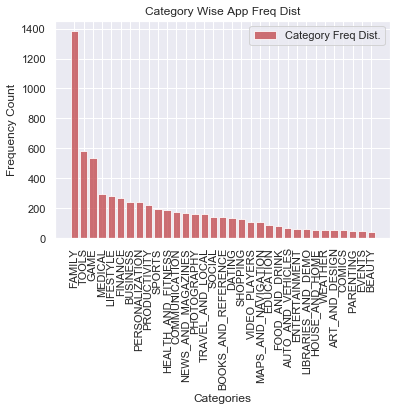

In [78]:
plt.bar(category_column_split.index, category_column_split.values, label = 'Category Freq Dist.', alpha = 0.8, color = 'r')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')

axes = plt.gca()
for label in axes.xaxis.get_ticklabels():    
    label.set_rotation(90)
    
plt.title('Category Wise App Freq Dist')
plt.legend()
plt.show()

2. Categories wise average rating

In [79]:
category_wise_avg_rating = df.groupby('Category').agg(np.mean)

In [80]:
category_wise_avg_rating

,Rating,Reviews,Installs,Price
Category,,,,
ART_AND_DESIGN,4.359,4213.741,448668.519,0.111
AUTO_AND_VEHICLES,4.160,4782.309,384261.765,0.029
BEAUTY,4.285,6863.561,412590.244,0.000
BOOKS_AND_REFERENCE,4.324,6433.283,386171.413,0.173
BUSINESS,4.070,4704.607,726017.238,0.269
COMICS,4.148,8623.717,472379.245,0.000
COMMUNICATION,4.027,10394.902,955411.092,0.326
DATING,3.930,6668.359,385667.252,0.175
EDUCATION,4.316,14336.289,809466.667,0.200


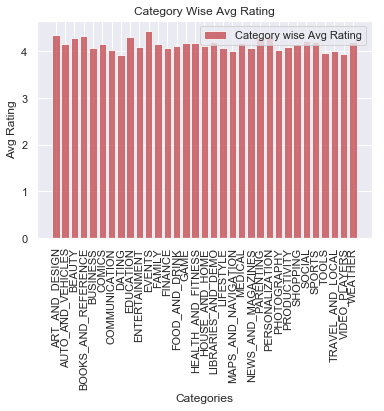

In [81]:
plt.bar(category_wise_avg_rating.index, category_wise_avg_rating['Rating'], color = 'r', alpha = 0.8, label = 'Category wise Avg Rating')
plt.xlabel('Categories')
plt.ylabel('Avg Rating')
plt.title('Category Wise Avg Rating')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()

3. Category wise total review

In [99]:
category_wise_total_reviews = df.groupby('Category').count()

In [100]:
category_wise_total_reviews

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
ART_AND_DESIGN,54,54,54,54,54,54,54,54,54,54,54,54
AUTO_AND_VEHICLES,68,68,68,68,68,68,68,68,68,68,68,68
BEAUTY,41,41,41,41,41,41,41,41,41,41,41,41
BOOKS_AND_REFERENCE,138,138,138,138,138,138,138,138,138,138,138,138
BUSINESS,239,239,239,239,239,239,239,239,239,239,239,239
COMICS,53,53,53,53,53,53,53,53,53,53,53,53
COMMUNICATION,174,174,174,174,174,174,174,174,174,174,174,174
DATING,131,131,131,131,131,131,131,131,131,131,131,131
EDUCATION,90,90,90,90,90,90,90,90,90,90,90,90


In [101]:
category_wise_total_reviews = category_wise_total_reviews.sort_values(by = 'Reviews', ascending = False)

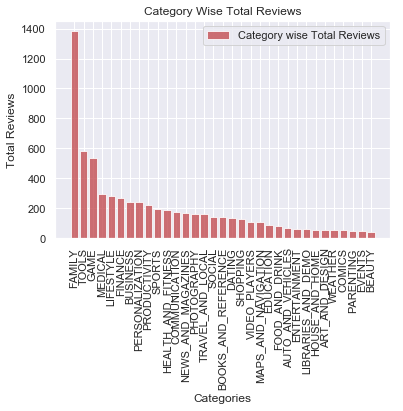

In [102]:
plt.bar(category_wise_total_reviews.index, category_wise_total_reviews['Reviews'], color = 'r', alpha = 0.8, label = 'Category wise Total Reviews')
plt.xlabel('Categories')
plt.ylabel('Total Reviews')
plt.title('Category Wise Total Reviews')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()

4. Category wise installs

In [103]:
category_wise_total_reviews = category_wise_total_reviews.sort_values(by = 'Installs', ascending = False)

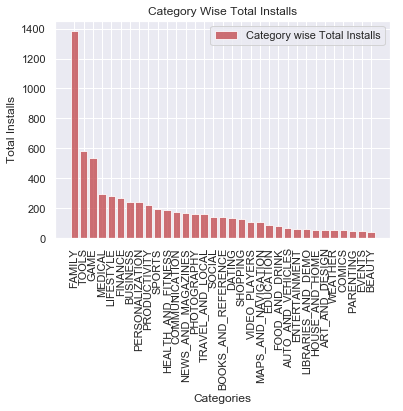

In [104]:
plt.bar(category_wise_total_reviews.index, category_wise_total_reviews['Installs'], color = 'r', alpha = 0.8, label = 'Category wise Total Installs')
plt.xlabel('Categories')
plt.ylabel('Total Installs')
plt.title('Category Wise Total Installs')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()

5. Category wise free/paid apps

In [166]:
category_wise_price_type = df.groupby(['Category', 'Type'])['App'].count().unstack()
category_wise_price_type = category_wise_price_type.sort_values(by = ['Free', 'Paid'], ascending = [False, False])

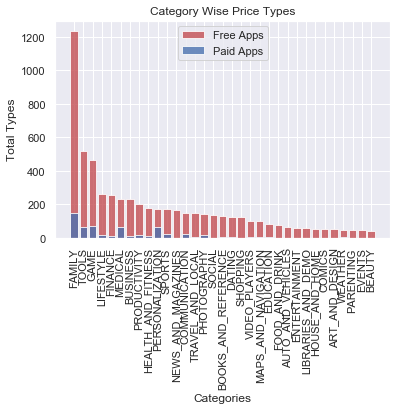

In [167]:
plt.bar(category_wise_price_type.index, category_wise_price_type['Free'], color = 'r', alpha = 0.8, label = 'Free Apps')
plt.bar(category_wise_price_type.index, category_wise_price_type['Paid'], color = 'b', alpha = 0.8, label = 'Paid Apps')
plt.xlabel('Categories')
plt.ylabel('Total Types')
plt.title('Category Wise Price Types')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()